            system  len_remodelled  len_not_remodelled  remodelled_percentage  \
0           ACVR1A               8                  19               0.296296   
1          ADARB1A               6                  39               0.133333   
2          CD44MMA              27                  81               0.250000   
3          DHTKD1A              13                  31               0.295455   
4         EPB41L3A            1481                1888               0.439596   
5           KLHL7B               5                   6               0.454545   
6            MID2A            1069                2837               0.273682   
7          MUREECA             556                1846               0.231474   
8   PGN_RS02895PGA               3                  12               0.200000   
9           RBBP7A              30                 113               0.209790   
10          SDCBPA              21                  68               0.235955   
11          SOCS2A          

<AxesSubplot:xlabel='system'>

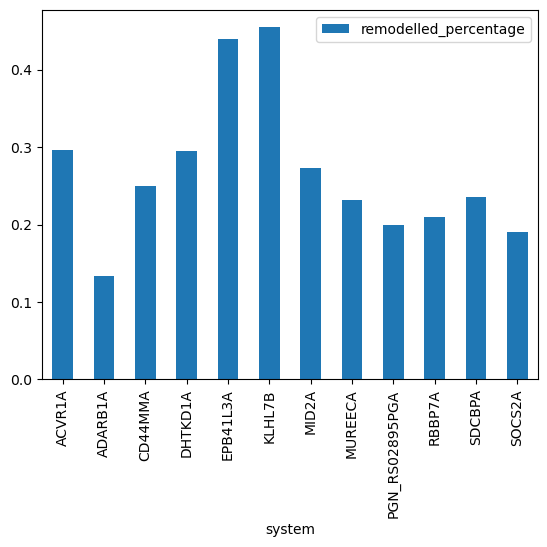

In [5]:
import pathlib
import pandas as pd

csvfile = '/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_20-07_29_42_PM/output_labels.csv'
# csvfile = '/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_data_paths/training_set.csv'

df = pd.read_csv(csvfile)

def num_remodelled_vs_not_all_systems(df):
    def num_remodelled_vs_not(df, system):
        df = df[df.system == system]
        df_remodelled = df[df['labels_remodelled_yes_no'] == 1]
        df_not_remodelled = df[df['labels_remodelled_yes_no'] == 0]
        df_remodelled_percentage = len(df_remodelled) / len(df)
        return {'system': system,
                'len_remodelled': len(df_remodelled), 
                'len_not_remodelled': len(df_not_remodelled),
                'remodelled_percentage': df_remodelled_percentage,
                'not_remodelled_percentage': 1 - df_remodelled_percentage}
    
    systems = df.system.unique()
    dfs = [df] * len(systems)
    
    lst = list(map(num_remodelled_vs_not, dfs, systems))
    return lst

lst = num_remodelled_vs_not_all_systems(df)
data = pd.DataFrame(lst)
print(data)

data.plot.bar(x='system', y='remodelled_percentage')

